# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data= pd.merge(mouse_metadata,study_results,how='outer')
# Display the data table for preview
combined_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice=combined_data["Mouse ID"].value_counts()
number_mice=len(mice)
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice                                                                 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_ID=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_ID

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
ID_df=combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
ID_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_clean=ID_df["Mouse ID"].value_counts()
mice_number=len(mice_clean)
mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = ID_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
tumor_mean


tumor_median =ID_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
tumor_median


tumor_variance = ID_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
tumor_variance


tumor_std =ID_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
tumor_std

tumor_sem = ID_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
tumor_sem

# Assemble the resulting series into a single summary DataFrame.
summary_stats=pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median,
                          "variance":tumor_variance,"std":tumor_std,"sem":tumor_sem})
summary_stats
summary_stats.to_csv("fileOne.csv",index=False,header=True)


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
single_group_by = ID_df.groupby('Drug Regimen')
summary_stats_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


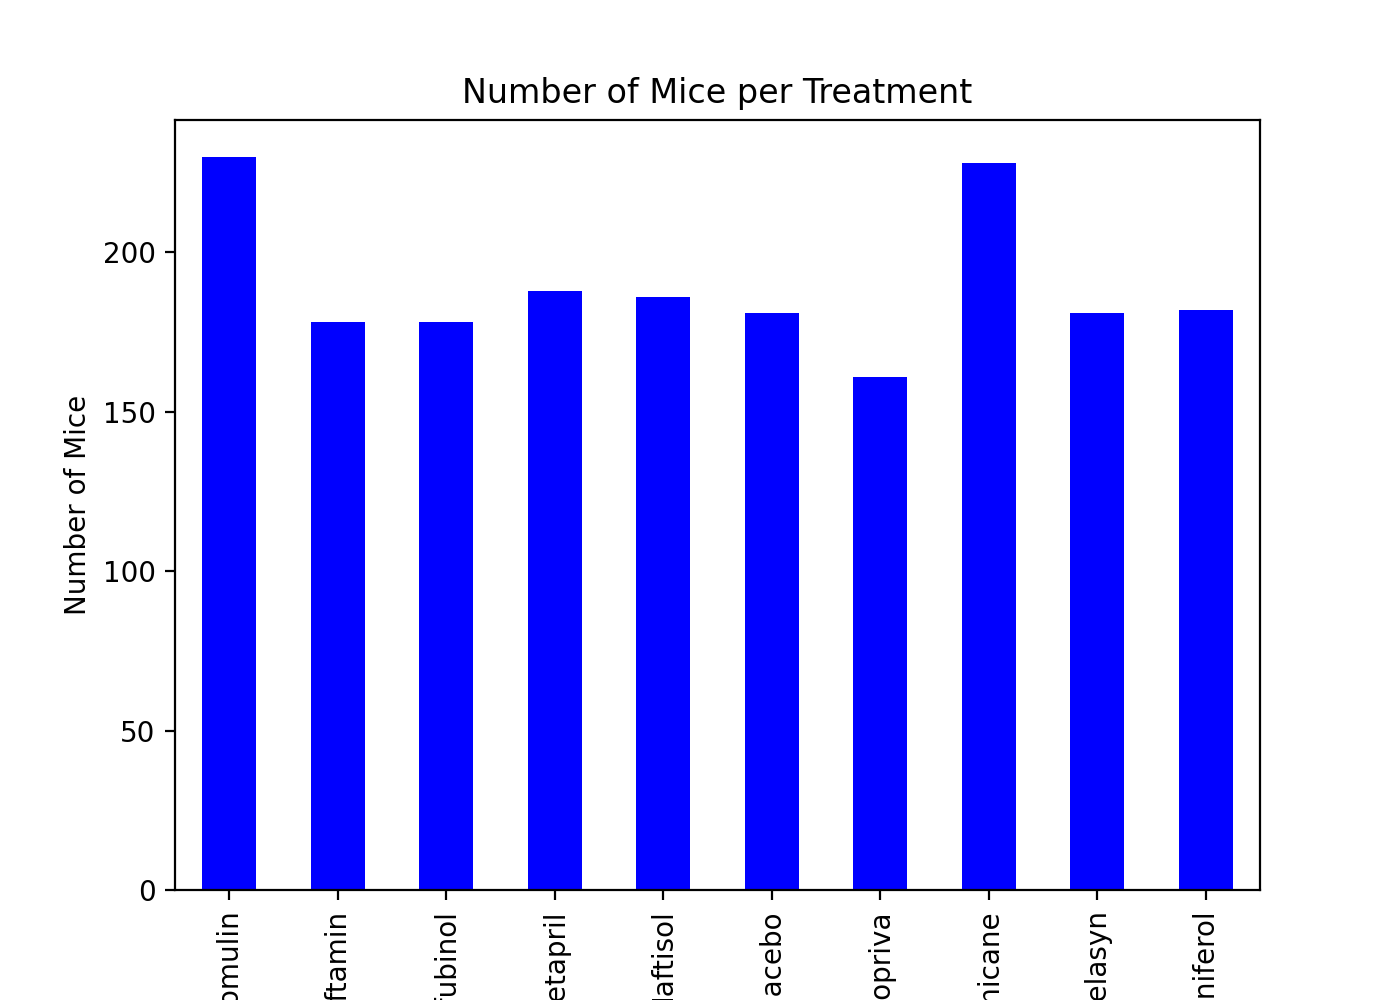

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = mice_count.plot.bar(figsize=(7,5), color='b')
mice_count
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show()
mice_count

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_list=(combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list


[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

<IPython.core.display.Javascript object>


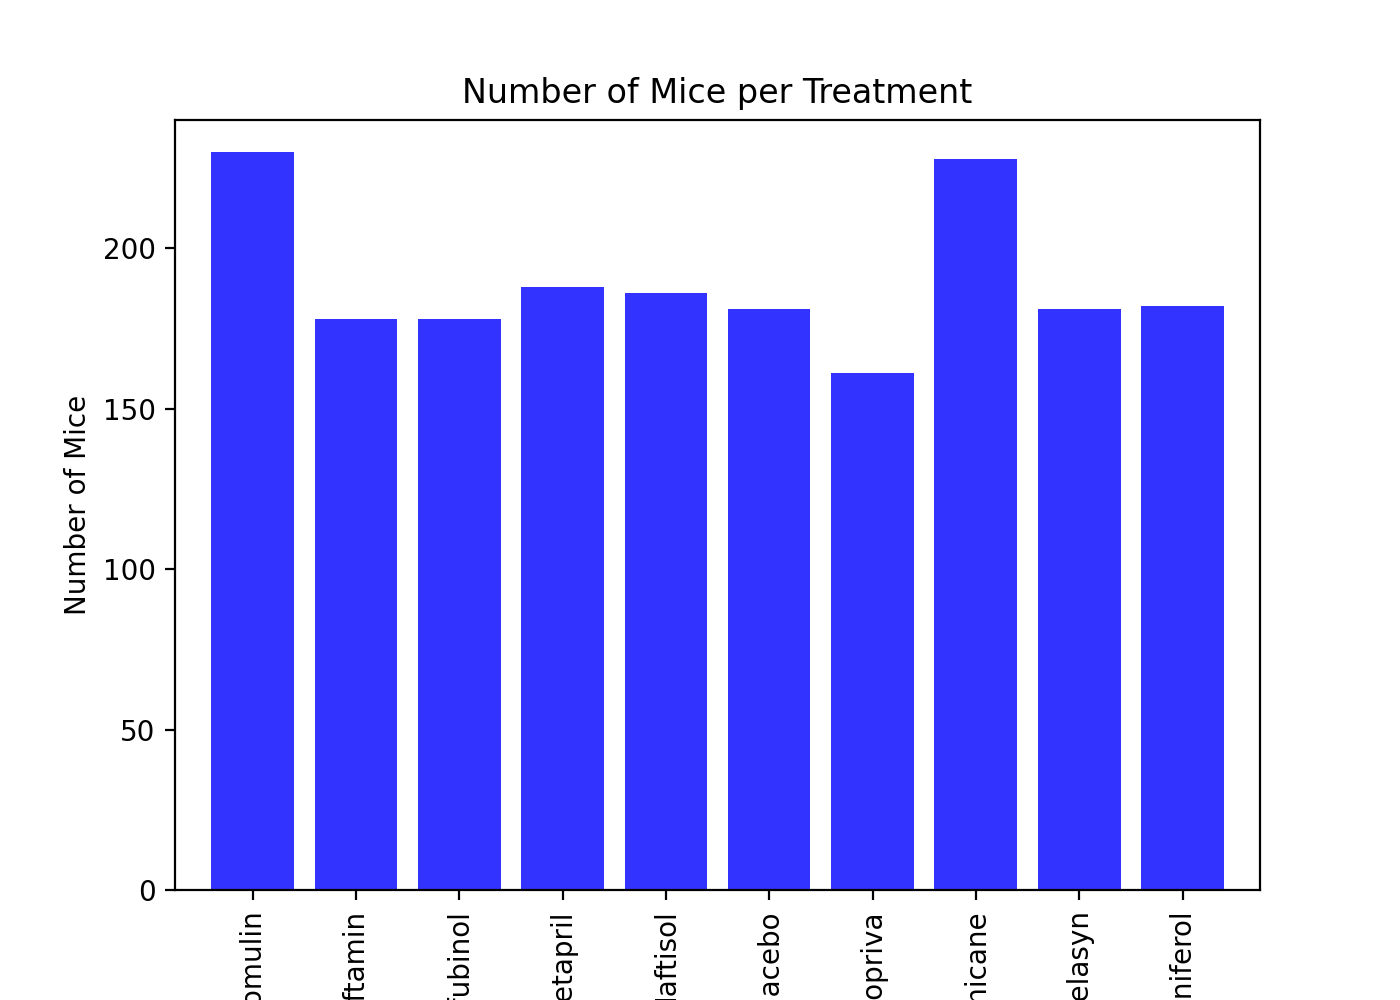

Text(0, 0.5, 'Number of Mice')

In [11]:
x_axis = np.arange(len(mice_count))
fig1, ax1 = plt.subplots(figsize=(7,5))
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")




In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#  Group by gender and get the number to plot
groupby_gender = combined_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender



,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


<IPython.core.display.Javascript object>


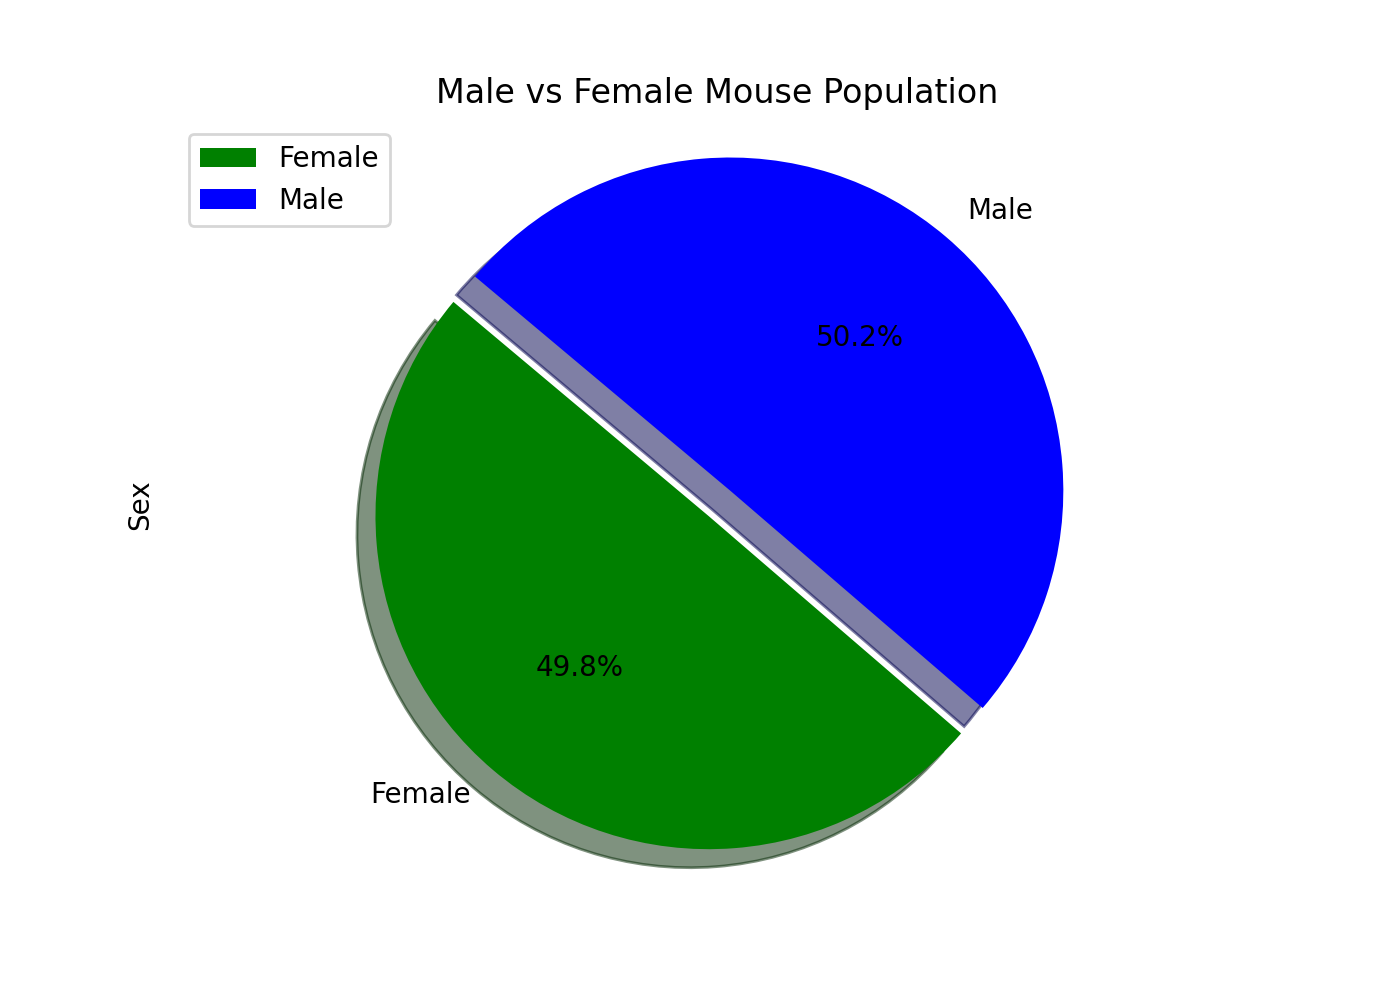

In [13]:
colors = ['green', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(7,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis("equal")
plt.show()

<IPython.core.display.Javascript object>


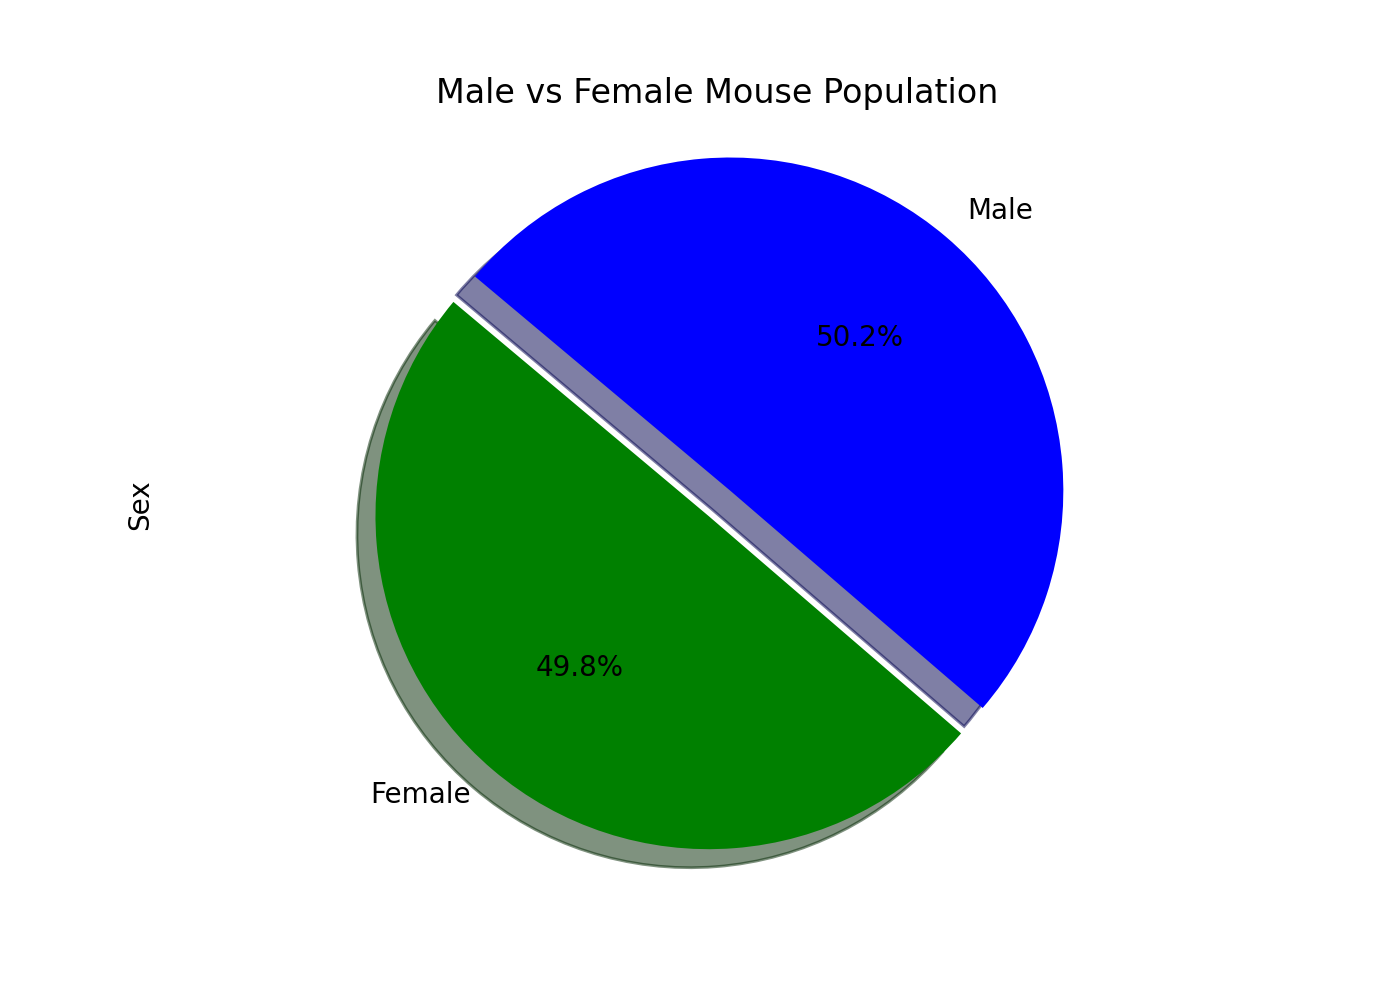

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]


sizes = [49.799197,50.200803]
colors = ['green', 'blue']
explode = (0.1, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(7, 5))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.axis("equal")


plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df=combined_data.loc[combined_data["Drug Regimen"]=="Capomulin",:]
Ramicane_df=combined_data.loc[combined_data["Drug Regimen"]=="Ramicane",:]
Infubinol_df=combined_data.loc[combined_data["Drug Regimen"]=="Infubinol",:]
Ceftamin_df=combined_data.loc[combined_data["Drug Regimen"]=="Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse

Capomulin_last =Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol=pd.DataFrame(Capomulin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

Capomulin_tumors=Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors:{lowerq}")
print(f"The upper quartile of Capomulin tumors:{upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The the median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

The lower quartile of Capomulin tumors:32.37735684
The upper quartile of Capomulin tumors:40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The the median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [17]:
Ramicane_last =Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol=pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()






,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [18]:
Ramicane_tumors=Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors:{lowerq}")
print(f"The upper quartile of Ramicane tumors:{upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The the median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 



The lower quartile of Ramicane tumors:31.56046955
The upper quartile of Ramicane tumors:40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The the median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [19]:
Infubinol_last =Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol=pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [20]:
Infubinol_tumors=Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors:{lowerq}")
print(f"The upper quartile of Infubinol tumors:{upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The the median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

The lower quartile of Infubinol tumors:54.04860769
The upper quartile of Infubinol tumors:65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The the median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
Ceftamin_last =Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol=pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
Ceftamin_tumors=Ceftamin_merge["Tumor Volume (mm3)"]

quartiles =Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors:{lowerq}")
print(f"The upper quartile of Ceftamin tumors:{upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The the median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

The lower quartile of Ceftamin tumors:48.72207785
The upper quartile of Ceftamin tumors:64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The the median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


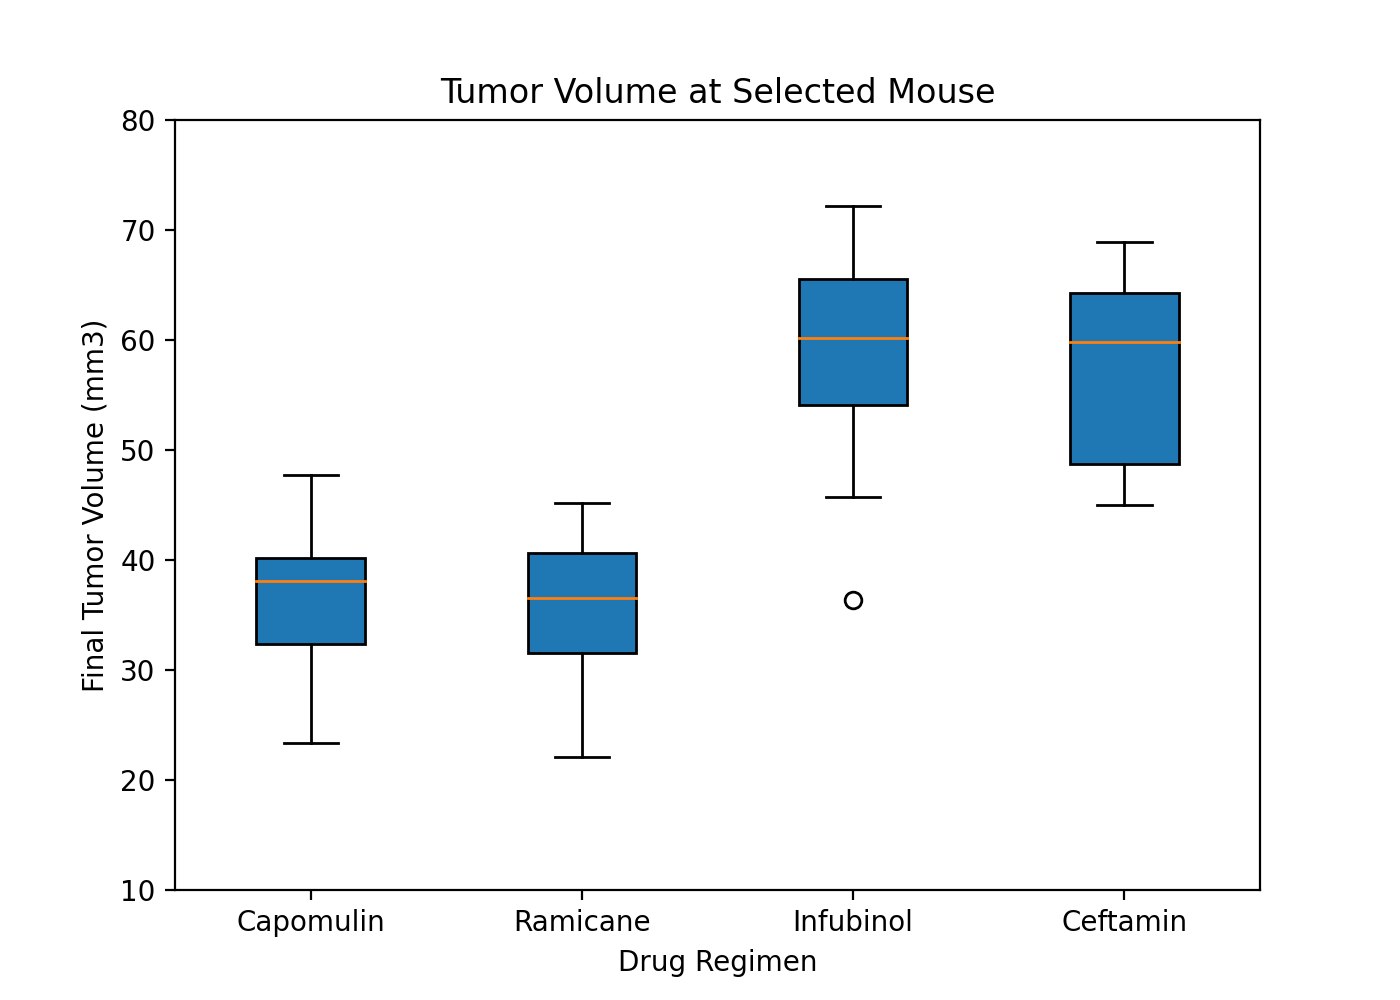

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plot_data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(plot_data, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)


plt.show()


## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin_df=Capomulin_df.loc[Capomulin_df["Mouse ID"]=="b742",:]
mouse_capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


<IPython.core.display.Javascript object>


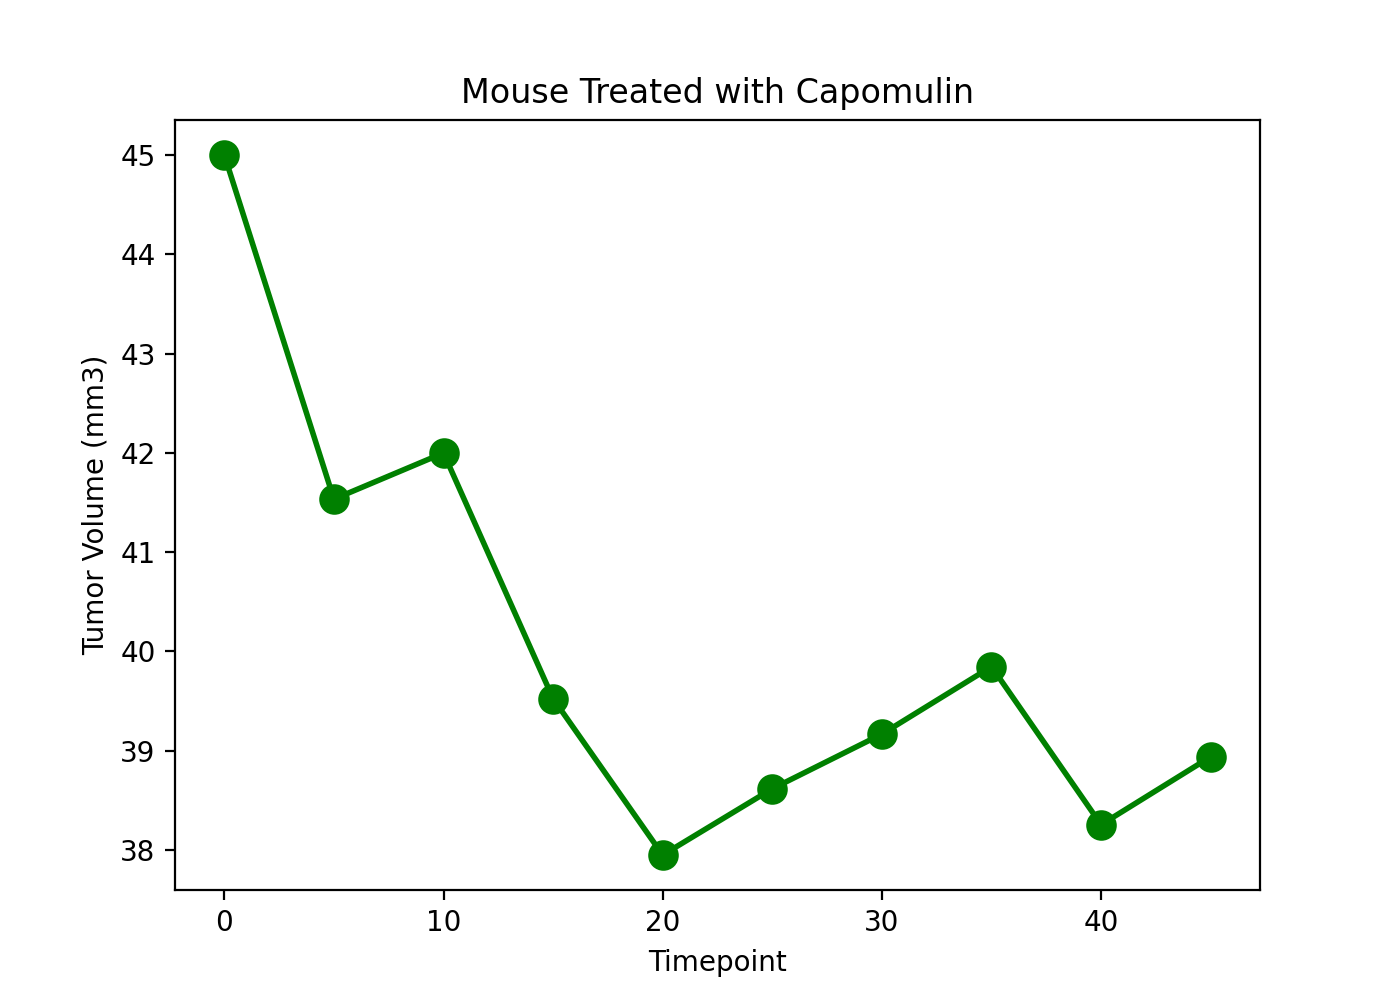

In [25]:
x_axis = mouse_capomulin_df["Timepoint"]
tumor_size = mouse_capomulin_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(7,5))
plt.title('Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis,tumor_size, linewidth=2, markersize=10, marker="o",color="green")
plt.show()

<IPython.core.display.Javascript object>


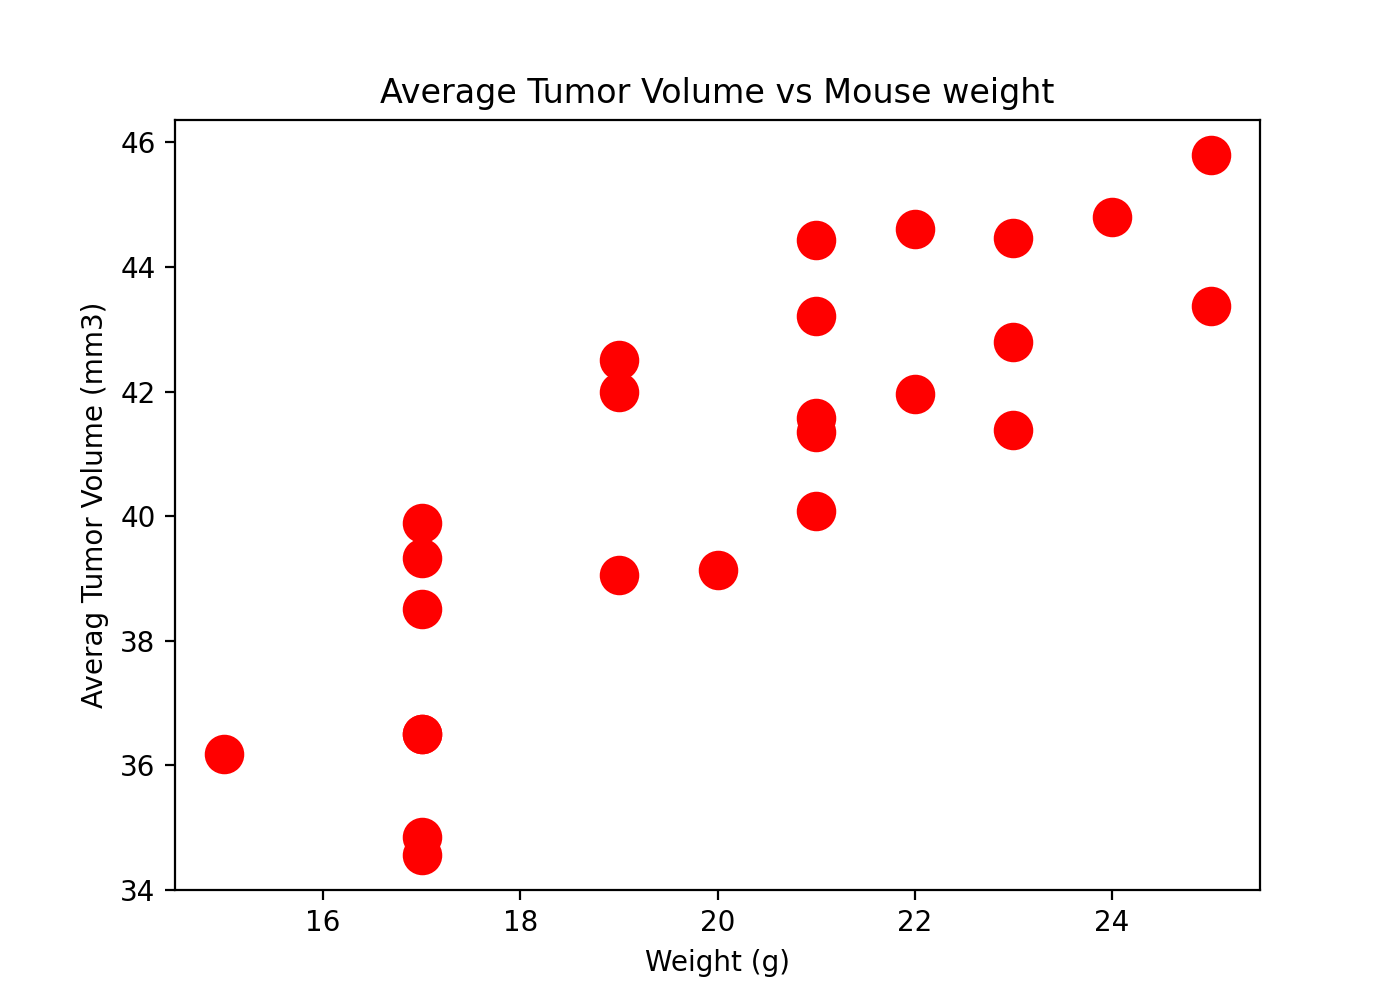

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


fig1, ax1 = plt.subplots(figsize=(7, 5))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="red")
plt.title('Average Tumor Volume vs Mouse weight')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


In [28]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

slope:0.9544396890241048
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
stderr:0.12754359033201323
y = 0.95x + 21.55


<IPython.core.display.Javascript object>


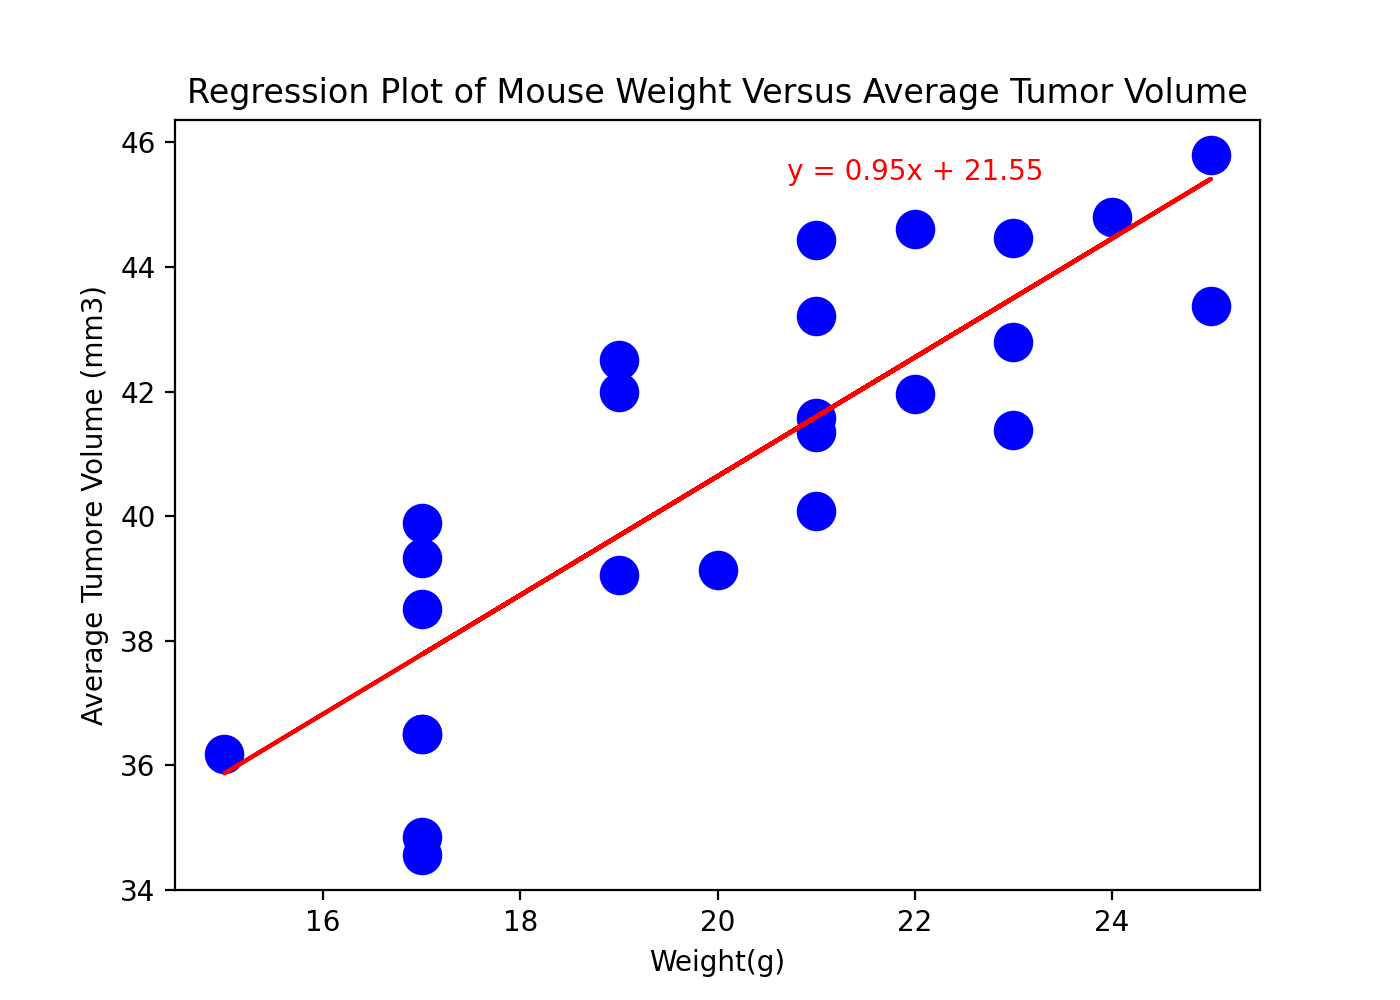

The r-squared is: 0.7088568047708723


In [29]:
fig1, ax1 = plt.subplots(figsize=(7,5))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")

print(f"The r-squared is: {rvalue**2}")


plt.show()